# Deep learning _ assignment 2 _ Tuan Lu Dinh _ a1866436

In [1]:
import numpy as np
import pandas as pd
from random import randrange
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


#1 Import the data and checking


In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks")


Mounted at /content/drive


In [ ]:
# Get data from the library
train = pd.read_csv('./sign_mnist_train.csv')
test = pd.read_csv('./sign_mnist_test.csv')

train_X, train_Y = train.iloc[:,1:], train.iloc[:,0]
test_X, test_Y = test.iloc[:,1:], test.iloc[:,0]

In [ ]:
# Check for NaN under an entire DataFrame
print("Nan values on train set exist:",sum(train.isna().sum()))
print("Nan values on test set exist:",sum(test.isna().sum()))
# Check for Null under an entire DataFrame
print("Null values on train set exist:",sum(train.isnull().sum()))
print("Null values on test set exist:",sum(test.isnull().sum()))

Nan values on train set exist: 0
Nan values on test set exist: 0
Null values on train set exist: 0
Null values on test set exist: 0


#2. Preprocess data

The data is scaled from 0-255 to 0-1. This will make things easier to work with the neural network because it will allow the nn to converge faster.

In [ ]:
train_X = train_X / 255.0

test_X = test_X / 255.0

In [ ]:
print(f"Shape of train set : X = {np.shape(train_X)}, Y = {np.shape(train_Y)}")
print(f"Shape of train set : X = {np.shape(test_X)}, Y = {np.shape(test_Y)}")

Shape of train set : X = (27455, 784), Y = (27455,)
Shape of train set : X = (7172, 784), Y = (7172,)


In [ ]:
train_X = train_X.values.reshape(-1,28,28,1)
test_X = test_X.values.reshape(-1,28,28,1)
print(train_X.shape)
print(test_X.shape)


(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Counting unique labels on train set
unique, counts = np.unique(train_Y, return_counts=True)
print (np.column_stack((unique, counts)))

[[   0 1126]
 [   1 1010]
 [   2 1144]
 [   3 1196]
 [   4  957]
 [   5 1204]
 [   6 1090]
 [   7 1013]
 [   8 1162]
 [  10 1114]
 [  11 1241]
 [  12 1055]
 [  13 1151]
 [  14 1196]
 [  15 1088]
 [  16 1279]
 [  17 1294]
 [  18 1199]
 [  19 1186]
 [  20 1161]
 [  21 1082]
 [  22 1225]
 [  23 1164]
 [  24 1118]]


In [ ]:
fig = px.histogram(train, 
                   x='label', 
                   color = 'label',
                   title="Distrubition of Labels in the Training Set",
                   width=700, height=500)
fig.show()

In [ ]:
# Counting unique labels on test set
unique, counts = np.unique(test_Y, return_counts=True)
print (np.column_stack((unique, counts)))

[[  0 331]
 [  1 432]
 [  2 310]
 [  3 245]
 [  4 498]
 [  5 247]
 [  6 348]
 [  7 436]
 [  8 288]
 [ 10 331]
 [ 11 209]
 [ 12 394]
 [ 13 291]
 [ 14 246]
 [ 15 347]
 [ 16 164]
 [ 17 144]
 [ 18 246]
 [ 19 248]
 [ 20 266]
 [ 21 346]
 [ 22 206]
 [ 23 267]
 [ 24 332]]


In [ ]:
fig = px.histogram(test, 
                   x='label', 
                   color = 'label',
                   title = 'Distrubition of Labels in the Test Set',
                   width=700, height=500)
fig.show()

Our training images are distributed evenly but unfortunatly our test images are not distributed as equally as the training set. It can cause problems when perform the accurate prediction so it is something to notice in the test process.

The label 9 and 25 columns are empty because they are not in the dataset.

#3. Image viewing

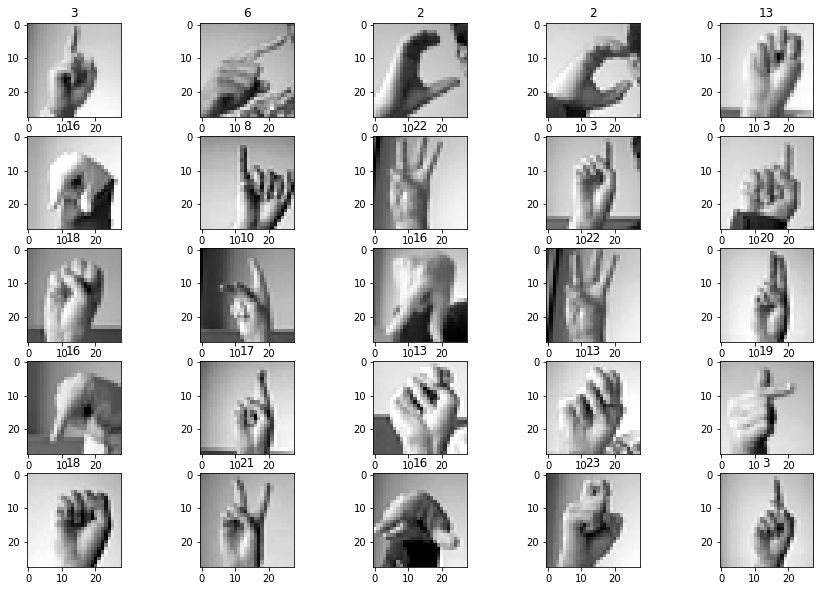

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(np.squeeze(train_X[i]), cmap='gray')
    plt.title(train_Y[i])
plt.show()

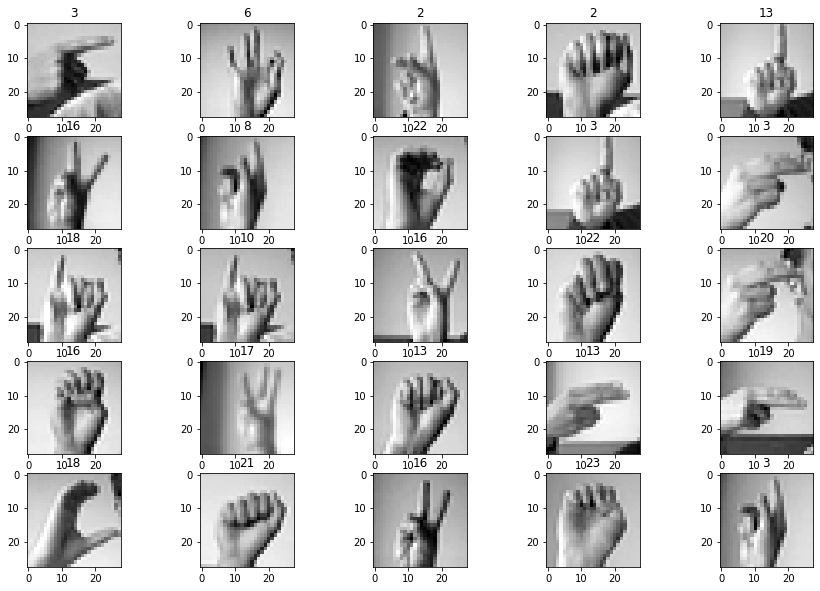

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(np.squeeze(test_X[i]), cmap='gray')
    plt.title(train_Y[i])
plt.show()

#4. CNN intial modelling


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator

#setting seed for reproducability
from numpy.random import seed
seed(10)
tf.random.set_seed(20)

##4.1 Data splitting

In [ ]:
#spliting training images into the images we will use for training the model and validating the model
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size = 0.3, random_state=7)

In [ ]:
#showing the shapes of our train, validate, and test images
print(train_X.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(19218, 28, 28, 1)
(19218,)
(8237, 28, 28, 1)
(8237,)
(7172, 28, 28, 1)
(7172,)


## 4.2 Model defination

In [ ]:
# Simple model 
model1 = keras.models.Sequential([
    layers.Flatten(input_shape = [28 , 28]), # our inputs are 28 x 28 arrays, so need to become 1D
    layers.Dense(300, activation = "relu"),  # first hidden layer
    layers.Dense(100, activation = "relu"),  # second hidden layer
    keras.layers.Dense(25, activation = "softmax") # output layer
])   
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
Total params: 268,125
Trainable params: 268,125
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)

## 4.3 Model training

In [ ]:
history1 = model1.fit(train_X, train_Y, epochs=10, validation_data=(val_X, val_Y))

Epoch 1/10
601/601 [==============================] - 7s 8ms/step - loss: 2.8313 - accuracy: 0.2101 - val_loss: 2.4473 - val_accuracy: 0.3220
Epoch 2/10
601/601 [==============================] - 4s 6ms/step - loss: 2.0194 - accuracy: 0.4290 - val_loss: 1.7611 - val_accuracy: 0.4522
Epoch 3/10
601/601 [==============================] - 3s 6ms/step - loss: 1.5359 - accuracy: 0.5502 - val_loss: 1.4925 - val_accuracy: 0.5486
Epoch 4/10
601/601 [==============================] - 4s 6ms/step - loss: 1.2713 - accuracy: 0.6269 - val_loss: 1.2259 - val_accuracy: 0.6363
Epoch 5/10
601/601 [==============================] - 4s 7ms/step - loss: 1.0860 - accuracy: 0.6832 - val_loss: 1.0418 - val_accuracy: 0.6755
Epoch 6/10
601/601 [==============================] - 5s 9ms/step - loss: 0.9459 - accuracy: 0.7194 - val_loss: 0.9069 - val_accuracy: 0.7165
Epoch 7/10
601/601 [==============================] - 5s 7ms/step - loss: 0.8302 - accuracy: 0.7550 - val_loss: 0.9108 - val_accuracy: 0.7028
Epoch 

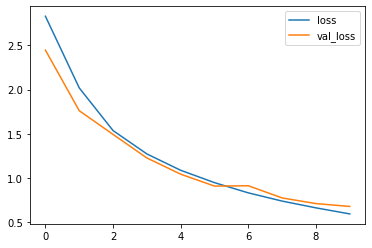

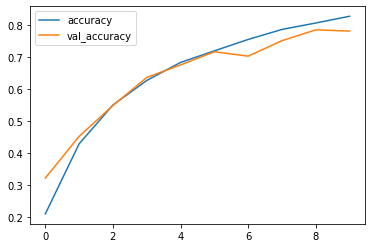

In [ ]:
#Viewing the training results
history_frame = pd.DataFrame(history1.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

## 4.4 Checking with the test dataset.

In [ ]:
#creating our predictions using the test pixel values
predictions1 = model1.predict(test_X)
predictions1 = np.argmax(predictions1,axis = 1)

#creating a report that show how our predictions compare with actual values
print(classification_report(test_Y, predictions1))

225/225 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       331
           1       0.98      0.70      0.82       432
           2       0.89      0.98      0.94       310
           3       1.00      0.51      0.68       245
           4       0.75      0.87      0.81       498
           5       0.70      0.84      0.77       247
           6       0.84      0.60      0.70       348
           7       0.81      0.81      0.81       436
           8       0.67      0.85      0.75       288
          10       0.63      0.14      0.22       331
          11       0.73      0.90      0.81       209
          12       0.65      0.37      0.47       394
          13       0.62      0.48      0.54       291
          14       0.63      0.62      0.62       246
          15       0.83      0.97      0.89       347
          16       0.75      0.78      0.76       164
          17       0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#5. Experiemental

## 5.1 Testing with Convolutional, Max Pooling, Batch normalization

In [ ]:
model2 = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),

    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

model2.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history2 = model2.fit(train_X, train_Y, epochs=10, validation_data=(val_X, val_Y))

Epoch 1/10
601/601 [==============================] - 33s 54ms/step - loss: 0.6414 - accuracy: 0.8249 - val_loss: 0.0427 - val_accuracy: 0.9967
Epoch 2/10
601/601 [==============================] - 32s 54ms/step - loss: 0.0113 - accuracy: 0.9996 - val_loss: 0.0056 - val_accuracy: 0.9999
Epoch 3/10
601/601 [==============================] - 35s 58ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 4/10
601/601 [==============================] - 33s 54ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/10
601/601 [==============================] - 33s 54ms/step - loss: 9.5502e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/10
601/601 [==============================] - 34s 56ms/step - loss: 6.5435e-04 - accuracy: 1.0000 - val_loss: 8.1226e-04 - val_accuracy: 1.0000
Epoch 7/10
601/601 [==============================] - 35s 58ms/step - loss: 4.9184e-04 - accuracy: 1.0000 - val_loss: 5.9002

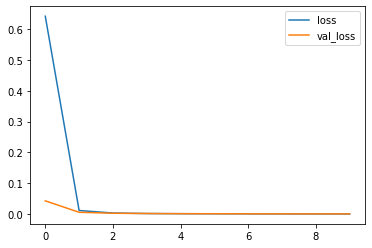

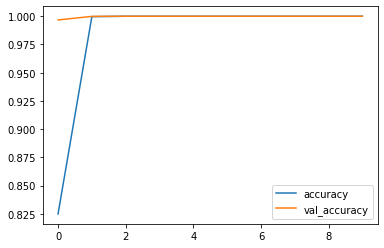

In [ ]:
#Viewing the training results
history_frame = pd.DataFrame(history2.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
#creating our predictions using the test pixel values
predictions = model2.predict(test_X)
predictions = np.argmax(predictions,axis = 1)

#creating a report that show how our predictions compare with actual values
print(classification_report(test_Y, predictions))

225/225 [==============================] - 3s 15ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.95      0.98       432
           2       1.00      0.94      0.97       310
           3       0.93      1.00      0.96       245
           4       0.92      0.96      0.94       498
           5       0.92      1.00      0.96       247
           6       0.85      0.87      0.86       348
           7       0.86      0.89      0.87       436
           8       0.89      0.80      0.84       288
          10       0.95      0.94      0.94       331
          11       0.85      1.00      0.92       209
          12       0.92      0.89      0.91       394
          13       0.91      0.73      0.81       291
          14       1.00      0.92      0.96       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.66  

## 5.3 Testing with dropout

In [ ]:
model_f = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

In [ ]:
model_f.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## 5.2 Training model

In [ ]:
history_f = model_f.fit(
    x = train_X,
    y = train_Y,
    validation_data= (val_X,val_Y),
    batch_size = 128,
    epochs=10,
    verbose=2,
)

Epoch 1/10
151/151 - 35s - loss: 3.2684 - accuracy: 0.0709 - val_loss: 3.2438 - val_accuracy: 0.0437 - 35s/epoch - 235ms/step
Epoch 2/10
151/151 - 35s - loss: 2.5533 - accuracy: 0.2194 - val_loss: 2.7243 - val_accuracy: 0.1338 - 35s/epoch - 230ms/step
Epoch 3/10
151/151 - 36s - loss: 1.6405 - accuracy: 0.4501 - val_loss: 1.3472 - val_accuracy: 0.5875 - 36s/epoch - 240ms/step
Epoch 4/10
151/151 - 34s - loss: 1.0797 - accuracy: 0.6219 - val_loss: 0.6112 - val_accuracy: 0.8323 - 34s/epoch - 226ms/step
Epoch 5/10
151/151 - 34s - loss: 0.7537 - accuracy: 0.7308 - val_loss: 0.3203 - val_accuracy: 0.9384 - 34s/epoch - 224ms/step
Epoch 6/10
151/151 - 34s - loss: 0.5634 - accuracy: 0.8049 - val_loss: 0.2259 - val_accuracy: 0.9632 - 34s/epoch - 225ms/step
Epoch 7/10
151/151 - 35s - loss: 0.4341 - accuracy: 0.8485 - val_loss: 0.1393 - val_accuracy: 0.9832 - 35s/epoch - 235ms/step
Epoch 8/10
151/151 - 33s - loss: 0.3408 - accuracy: 0.8826 - val_loss: 0.0941 - val_accuracy: 0.9903 - 33s/epoch - 221

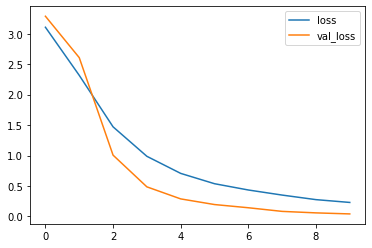

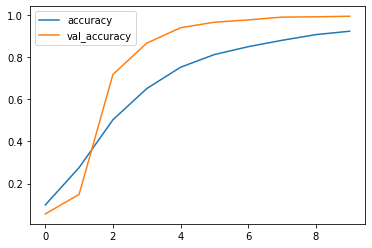

In [ ]:
#Viewing the training results
history_frame = pd.DataFrame(history_f.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

## 5.3 Checking with the test dataset

In [ ]:
#creating our predictions using the test pixel values
predictions = model_f.predict(test_X)
predictions = np.argmax(predictions,axis = 1)

#creating a report that show how our predictions compare with actual values
print(classification_report(test_Y, predictions))

225/225 [==============================] - 4s 17ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       331
           1       1.00      1.00      1.00       432
           2       1.00      0.99      1.00       310
           3       1.00      0.99      1.00       245
           4       0.95      0.91      0.93       498
           5       1.00      1.00      1.00       247
           6       0.94      0.94      0.94       348
           7       0.95      0.95      0.95       436
           8       0.99      1.00      0.99       288
          10       1.00      0.99      0.99       331
          11       1.00      1.00      1.00       209
          12       0.79      0.98      0.88       394
          13       1.00      0.76      0.87       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       0.99      1.00      1.00       164
          17       0.92  

We were able to get an average accuracy of 97% according to the classification report. The biggest take away for me was that the BatchNormalization and Dropout layers really helped with increasing the accuracy. The Dropout layers seemed to really smooth out the training results as well.